In [1]:
import numpy as np
from cpr_reputation.board import Board, get_neighbors, random_board, NEIGHBOR_KERNEL, HarvestGame, Position
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.ndimage import convolve


In [ ]:
game = HarvestGame(10, (20, 20))

In [3]:
game.get_agent_obs("Agent3").shape

(20, 21, 3)

In [5]:
game.get_beam_bounds("Agent0")

(Position(i=1, j=0), Position(i=0, j=-1))

In [21]:
game.beam_dist

10

In [20]:
game.agents

{'Agent0': Walker(pos=Position(i=0, j=0), rot=0, frozen=0),
 'Agent1': Walker(pos=Position(i=0, j=1), rot=0, frozen=0),
 'Agent2': Walker(pos=Position(i=0, j=2), rot=0, frozen=0),
 'Agent3': Walker(pos=Position(i=0, j=3), rot=3, frozen=0),
 'Agent4': Walker(pos=Position(i=1, j=0), rot=0, frozen=0),
 'Agent5': Walker(pos=Position(i=1, j=1), rot=2, frozen=0),
 'Agent6': Walker(pos=Position(i=1, j=2), rot=0, frozen=0),
 'Agent7': Walker(pos=Position(i=1, j=3), rot=2, frozen=0),
 'Agent8': Walker(pos=Position(i=2, j=0), rot=2, frozen=0),
 'Agent9': Walker(pos=Position(i=2, j=1), rot=0, frozen=0)}

In [18]:
Position(1, 0) * 5 + Position(0, 1) * 7

Position(i=5, j=7)

In [13]:
from numba import njit

In [17]:
foo = np.random.randint(2, size=(20, 20))

In [69]:
foo = np.random.rand(100, 200)

In [70]:
%%timeit
bar = np.ascontiguousarray(np.rot90(foo))

21.5 µs ± 699 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [71]:
%%timeit
bar = np.ascontiguousarray(foo.T[::-1])

13.4 µs ± 580 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [56]:
np.ascontiguousarray

<function numpy.ascontiguousarray(a, dtype=None)>

In [47]:
%%timeit
bar = np.rot90(foo, 2)

6.78 µs ± 123 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
%%timeit
bar = foo[::-1,::-1]

248 ns ± 6.17 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [93]:
foo = np.arange(12).reshape((3,4))

In [96]:
bar = np.arange(28).reshape((7,4))

In [103]:
np.concatenate((foo, bar), axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27]])

In [76]:
bar = foo.T[::-1]
bar.data.contiguous

False

In [89]:
foo = np.zeros((30, 30))

In [90]:
i, j = 20, 15
foo[i, j] = 1
bar = foo[i - 19: i + 1, j-10:j+11]

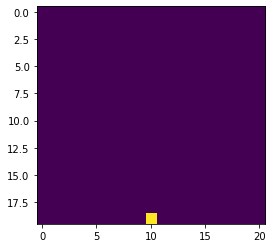

In [92]:
plt.imshow(bar)

In [87]:
bar.shape

(20, 21)

In [77]:
bar = np.rot90(foo, 1)

In [78]:
bar.data.contiguous

False

In [67]:
foo.T[:,::-1]

array([[ 8,  4,  0],
       [ 9,  5,  1],
       [10,  6,  2],
       [11,  7,  3]])

In [53]:
(foo.T[::-1] == np.rot90(foo)).all()

True

In [38]:
foo[::-1,::-1]

array([[11, 10,  9,  8],
       [ 7,  6,  5,  4],
       [ 3,  2,  1,  0]])

In [40]:
np.rot90(foo)

array([[ 3,  7, 11],
       [ 2,  6, 10],
       [ 1,  5,  9],
       [ 0,  4,  8]])

In [42]:
foo.T[::-1]

array([[ 3,  7, 11],
       [ 2,  6, 10],
       [ 1,  5,  9],
       [ 0,  4,  8]])

In [20]:
convolve(foo, NEIGHBOR_KERNEL)

array([[ 9, 11,  9,  7,  7,  5,  6,  4,  2,  1,  3,  3,  2,  1,  2,  3,
         5,  8, 10, 12],
       [10,  8,  8,  8,  8,  6,  4,  4,  3,  4,  3,  2,  3,  3,  2,  4,
         6,  7, 10, 11],
       [ 7,  9,  9,  7,  6, 10,  5,  2,  5,  6,  3,  2,  4,  5,  5,  3,
         5,  8, 10,  9],
       [10,  6,  8,  8,  8,  7,  6,  5,  5,  4,  6,  6,  3,  4,  6,  6,
         8,  9,  6,  7],
       [ 8,  9,  8,  9,  8,  7,  7,  6,  5,  5,  4,  5,  6,  6,  6,  9,
         7,  5,  6,  7],
       [ 8, 10,  8,  9, 10,  8,  7,  6,  5,  7,  5,  3,  3,  6,  7,  9,
         7,  5,  6,  4],
       [ 8,  8,  8, 10, 10,  9,  6,  6,  5,  4,  3,  3,  3,  7,  9,  6,
         7,  5,  3,  5],
       [ 7,  5, 10,  9,  8,  7,  7,  6,  5,  3,  2,  2,  5,  6,  8,  6,
         4,  5,  5,  4],
       [ 5,  6,  6,  8, 10,  9,  7,  3,  5,  4,  2,  2,  5,  7,  6,  8,
         5,  4,  5,  4],
       [ 3,  7,  7,  9,  9,  8,  6,  7,  6,  2,  4,  5,  6,  6,  6,  7,
         7,  3,  3,  7],
       [ 5,  7,  8,  9,  8,  6

In [7]:
def regenerate_apples(board: Board):
    """
    Stochastically respawn apples based on number of neighbors:

    prob | n_neighbors
    ------------------
    0    | L = 0
    0.01 | L = 1 or 2
    0.05 | L = 3 or 4
    0.1  | L > 4

    Could probably be faster...
    """
    # TODO: I still think this should be a function.
    #  Also we need to profile it, it will be slow on large boards (easier to do with a function)
    prob_table = defaultdict(lambda: 0.1)
    prob_table[0] = 0.0
    prob_table[1] = 0.01
    prob_table[2] = 0.01
    prob_table[3] = 0.05
    prob_table[4] = 0.05

    prob_map = np.zeros(board.shape)
    for row in range(board.shape[0]):
        for col in range(board.shape[1]):
            pos = (row, col)
            neighboring_pos = get_neighbors(pos, board.shape, radius=2)
            neighboring_apples = sum([board[r][c] for (r, c) in neighboring_pos])
            prob_map[row][col] = prob_table[neighboring_apples]

    rand = np.random.rand(*prob_map.shape)
    regen_map = rand < prob_map
    updated_board = np.clip(board + regen_map, 0, 1)
    return updated_board

In [8]:
board = random_board((20, 40))

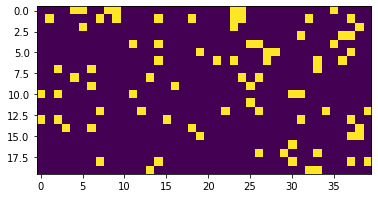

In [9]:
plt.imshow(board)

In [10]:
%%timeit
regenerate_apples(board)

89.4 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
from numba import vectorize

In [13]:
@vectorize
def regrow_prob(n: int) -> float:
    if n == 0:
        return 0.0
    elif n == 1 or n == 2:
        return 0.01
    elif n == 3 or n == 4:
        return 0.05
    else:
        return 0.1

def regenerate_apples(board):
    kernel = NEIGHBOR_KERNEL
    neighbor_map: np.ndarray = convolve(board, kernel, mode='constant')  # TODO: make sure this is ints
    prob_map = regrow_prob(neighbor_map)

    rand = np.random.rand(*neighbor_map.shape)
    regen_map = rand < prob_map
    updated_board = np.clip(board + regen_map, 0, 1)


    return updated_board

In [56]:
%%timeit
regenerate_apples(board)

63.4 µs ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [2]:
import numpy as np

In [9]:
board = np.random.rand(100, 100, 3)

In [10]:
%%timeit
np.rot90(board)

8.24 µs ± 154 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
